## Quiver and Stream Plots

In this section, you will learn how to build quiver and stream plots using **matplotlib**

### Quiver Plots

A quiver plot is a type of 2D plot that shows vector lines as arrows. Quiver plots are useful in electrical engineering to visualize electrical potential and useful in mechanical engineering to show stress gradients.

To build a quiver plot, first import **matplotlib**. Again, by convention - the alias ```plt``` is used.  If using a Jupyter notebook include the line ```%matplotlib inline```. For some of the quiver plots in this section, **numpy** will be needed as well.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#### Quiver plot with one arrow

Let's buid a simple quiver plot that contains one arrow to see how matplotlib's ```ax.quiver()``` method works. The ```ax.quiver()``` method takes four positional arguments: 

```
ax.quiver(x_pos, y_pos, x_direct, y_direct)
```
Where ```x_pos``` and ```y_pos``` are the arrow starting positions and ```x_direct```, ```y_direct``` are the arrow directions.

Let's build our first plot which contains one quiver arrow at the starting point ```x_pos = 0```, ```y_pos = 0```. We'll define the quiver arrow's direction as pointing up and to the right ```x_direct = 1```, ```y_direct = 1```.


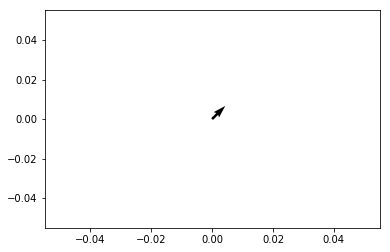

In [2]:
fig, ax = plt.subplots()

x_pos = 0
y_pos = 0
x_direct = 1
y_direct = 1

ax.quiver(x_pos,y_pos,x_direct,y_direct)

plt.show()

We see one arrow pointing up and to the right.

#### Quiver plot with two arrows

Now let's add a second arrow to the quiver plot by passing in two starting points and two arrow directions. 

We'll keep our original arrow starting position at the origin ```0,0``` and pointing up and to the right, direction ```1,1```. We'll define a second arrow with a starting position of ```-0.5,0.5``` which points straight down (in the ```0,-1``` direction).

An additional keyword argument to add the the ```ax.quiver()``` method is ```scale=5```. Including ```scale=5``` scales the arrow lengths so the arrows look longer and show up better on the quiver plot. 

To see the start and end of both arrows, we'll  set the axis limits between ```-1.5``` and ```1.5``` using the ```ax.axis()``` method and passing in a list of axis limits in the form ```[xmin, xmax, ymin, ymax]```.  

We can see two arrows. One arrow points to the upper right and the other arrow points straight down.

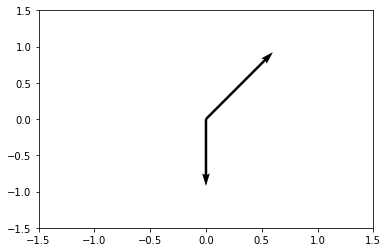

In [3]:
fig, ax = plt.subplots()

x_pos = [0, 0]
y_pos = [0, 0]
x_direct = [1, 0]
y_direct = [1, -1]

ax.quiver(x_pos,y_pos,x_direct,y_direct,
         scale=5)
ax.axis([-1.5, 1.5, -1.5, 1.5])

plt.show()

#### Quiver plot using a meshgrid

Two arrows is great, but to create a whole 2D surface worth of arrows, we'll utilize **numpy's** ```meshgrid()``` function. 

We need to build a set of arrays that denote the x and y starting positions of each quiver arrow on the plot. We will call our quiver arrow starting position arrays ```X``` and ```Y```.

We can use the x,y arrow starting _positions_ to define the x and y components of each quiver arrow _direction_. We will call the quiver arrow direction arrays ```u``` and ```v```. On this quiver plot, we will define the quiver arrow direction based upon the quiver arrow starting point using:

$$ x_{direction} = cos(x_{starting \ point}) $$

$$ y_{direction} = sin(y_{starting \ point}) $$

In [5]:
x = np.arange(0,2.2,0.2)
y = np.arange(0,2.2,0.2)

X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y
v = np.sin(y)*Y

Now we will build the quiver plot using **matplotlib's** ```ax.quiver()``` method. Again, the method call takes four positional arguments:

```
ax.quiver(x_pos, y_pos, x_direct, y_direct)
```

This time ```x_pos``` and ```y_pos``` are 2D arrays which contain the starting positions of the arrows and ```x_direct```, ```y_direct``` are 2D arrays which contain the arrow directions.

The commands ```ax.xaxis.set_ticks([])``` and ```ax.yaxis.set_ticks([])``` removes the tick marks from the axis and ```ax.set_aspect('equal')``` sets the aspect ratio of the plot to 1:1.

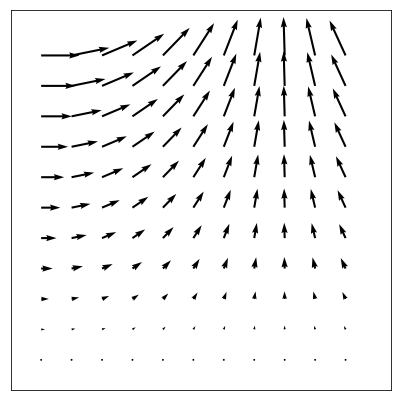

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
ax.quiver(X,Y,u,v)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([-0.2, 2.3, -0.2, 2.3])
ax.set_aspect('equal')

plt.show()

Now let's build another quiver plot with the $\hat{i}$ and $\hat{j}$ components of the arrows, $\vec{F}$ are dependant upon the arrow starting point $x,y$ according to the function:

$$ \vec{F} = \frac{x}{5} \ \hat{i} - \frac{y}{5} \ \hat{j} $$

Again we can use **numpy's** ```np.meshgrid()``` function to build the arrow starting position arrays, then apply our function  $\vec{F}$ to the $x$ and $y$ arrow starting point arrays.

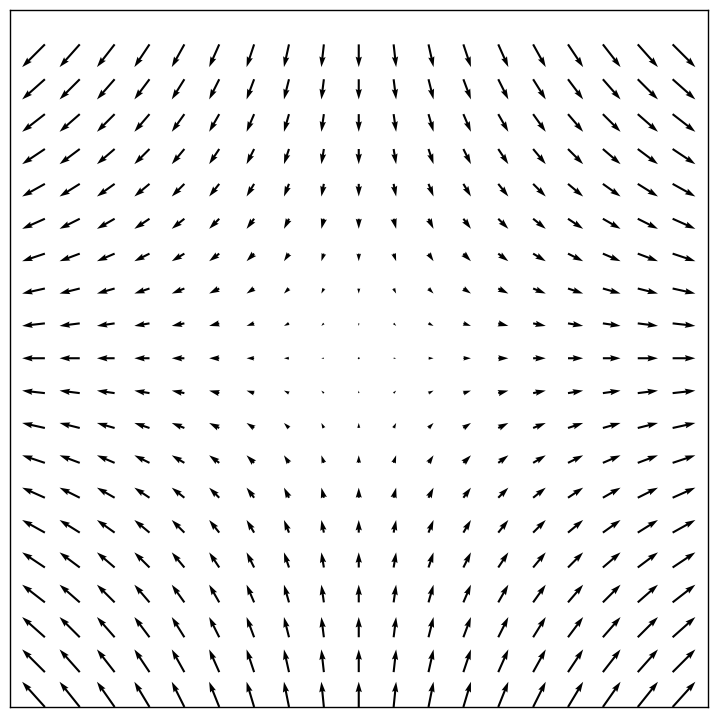

In [11]:
x = np.arange(-1,1,0.1)
y = np.arange(-1,1,0.1)

X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y
v = np.sin(y)*Y

X,Y = np.meshgrid(x,y)

u = X/5
v = -Y/5

fig, ax = plt.subplots(figsize=(9,9))

ax.quiver(X,Y,u,v)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')

plt.show()

#### Quiver plot containing a gradient

Next let's build another quiver plot using the gradient function. The gradient function will have the form:

$$ z = xe^{-x^2-y^2} $$

We can use **numpy's** ```np.gradient()``` function to apply the gradient function to every arrow's x,y starting position.

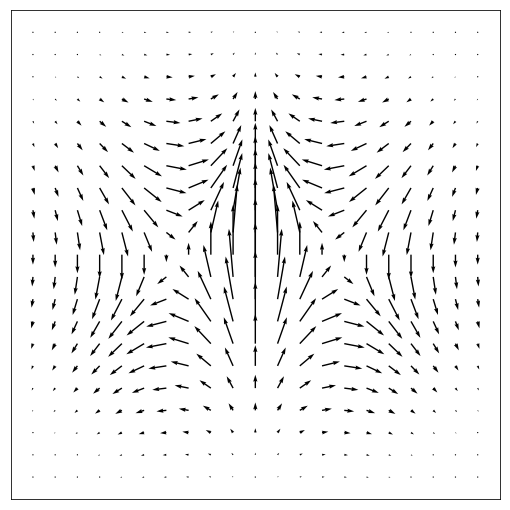

In [7]:
x = np.arange(-2,2.2,0.2)
y = np.arange(-2,2.2,0.2)


X, Y = np.meshgrid(x, y)
z = X*np.exp(-X**2 -Y**2)
dx, dy = np.gradient(z)


fig, ax = plt.subplots(figsize=(9,9))

ax.quiver(X,Y,dx,dy)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')

plt.show()

#### Quiver plot with four vortices

Now let's build a quiver plot containing four vortices. The function $\vec{F}$ which describes the 2D field is:

$$ \vec{F} = sin(x)cos(y) \ \hat{i} -cos(x)sin(y) \ \hat{j} $$

Again we can build these arrays using **numpy** and plot them with **matplotlib**.

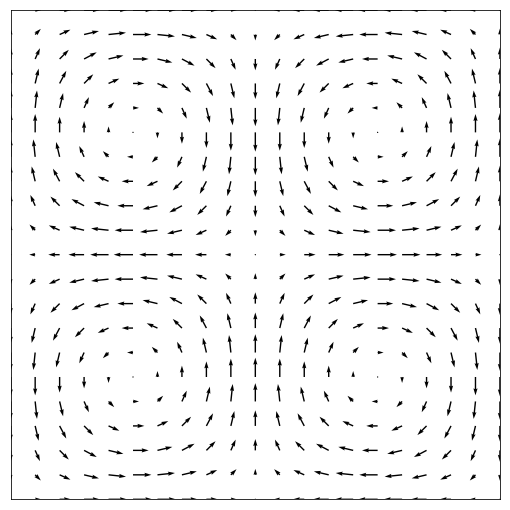

In [8]:
x = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/20)
y = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/20)

X,Y = np.meshgrid(x,y)

u = np.sin(X)*np.cos(Y)
v = -np.cos(X)*np.sin(Y)

fig, ax = plt.subplots(figsize=(9,9))

ax.quiver(X,Y,u,v)

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.axis([0,2*np.pi,0,2*np.pi])
ax.set_aspect('equal')

plt.show()

#### Quiver plots with color

Now let's add some color to the quiver plots. The ```ax.quiver()``` method has an optional fifth positional argument that specifies the quiver arrow color. The quiver arrow color argument needs to have the same dimensions as the position and direction arrays. 

Using **matplotlib** subplots, we can build a figure which contains 3 quiver plots each in color

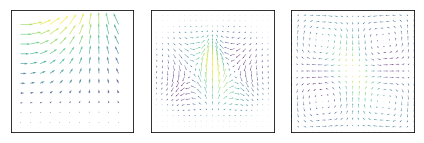

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, [ax1,ax2,ax3] = plt.subplots(1,3)

x = np.arange(0,2.2,0.2)
y = np.arange(0,2.2,0.2)

X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y
v = np.sin(y)*Y

n = -2
R = np.sqrt(((v-n)/2)**2 + ((u-n)/2)**2)

ax1.quiver(X,Y,u,v,R, alpha=0.8)

ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.axis([-0.2, 2.3, -0.2, 2.3])
ax1.set_aspect('equal')

x = np.arange(-2,2.2,0.2)
y = np.arange(-2,2.2,0.2)


X, Y = np.meshgrid(x, y)
z = X*np.exp(-X**2 -Y**2)
dx, dy = np.gradient(z)

n = -2
R = np.sqrt(((dx-n)/2)**2 + ((dy-n)/2)**2)


ax2.quiver(X,Y,dx,dy,R)

ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_aspect('equal')

x = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/20)
y = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/20)

X,Y = np.meshgrid(x,y)

u = np.sin(X)*np.cos(Y)
v = -np.cos(X)*np.sin(Y)

n = -1
R = np.sqrt(((dx-n)/2)**2 + ((dy-n)/2)**2)



ax3.quiver(X,Y,u,v,R)

ax3.xaxis.set_ticks([])
ax3.yaxis.set_ticks([])
ax3.axis([0,2*np.pi,0,2*np.pi])
ax3.set_aspect('equal')

plt.tight_layout()
fig.savefig('3_quiver_plots.png', dpi=300, bbox_inches='tight')

plt.show()

### Stream Plots

A stream plot is a type of plot used to show fluid flow and 2D field gradiants. 

The basic method to build a stream plot in **matplotlib** is:

```
ax.streamplot(x_grid,y_grid,x_vec,y_vec, density=spacing)
````

Where ```x_grid``` and ```y_grid``` are arrays of x,y points. The arrays ```x_vec``` and ```y_vec``` denote the stream velocity at each point on the grid. The keyword argument ```density=spacing``` specifies how close together to draw the stream lines.

#### A simple stream plot

Let's build a simple plot of stream lines on a 10 x 10 grid where all the stream lines are parallel and point to the right. 

In [10]:
import matplotlib.pyplot as plt
import numpy as np

#include if using a jupyter notebook. If using a .py script, comment out
%matplotlib inline

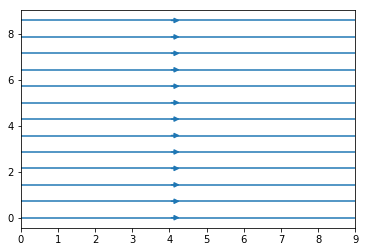

In [11]:
x = np.arange(0,10)
y = np.arange(0,10)

X, Y = np.meshgrid(x,y)
u = np.ones((10,10))
v = np.zeros((10,10))

fig, ax = plt.subplots()

ax.streamplot(X,Y,u,v, density = 0.5)

plt.show()

The plot contains parallel streamlines all pointing to the right.

#### Stream plot of a field

We can build a stream plot which shows field lines based on a defined 2D vector field.

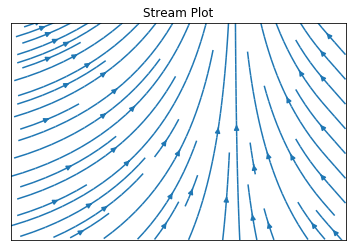

In [12]:
x = np.arange(0,2.2,0.1)
y = np.arange(0,2.2,0.1)

X, Y = np.meshgrid(x, y)
u = np.cos(X)*Y
v = np.sin(y)*Y

fig, ax = plt.subplots()

ax.streamplot(X,Y,u,v, density = 1)
ax.axis([0.5,2.1,0,2])
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_title('Stream Plot')

plt.show()

#### Stream plot of two point charges

We can build a stream plot showing the electric field due to two point charages.  The electric field at any point is dependant upon the position and distance relative to the point charges.



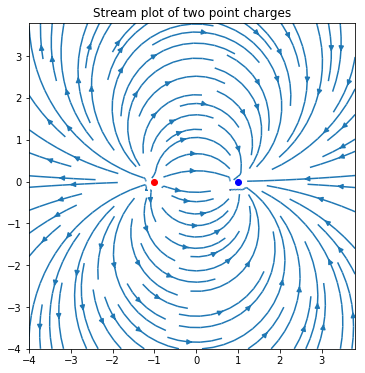

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4,4,0.2)
y = np.arange(-4,4,0.2)

X,Y = np.meshgrid(x,y)
Ex = (X + 1)/((X+1)**2 + Y**2) - (X - 1)/((X-1)**2 + Y**2)
Ey = Y/((X+1)**2 + Y**2) - Y/((X-1)**2 + Y**2)


fig, ax = plt.subplots(figsize=(6,6))
ax.streamplot(X,Y,Ex,Ey)
ax.set_aspect('equal')
ax.plot(-1,0,'-or')
ax.plot(1,0,'-ob')

ax.set_title('Stream plot of two point charges')
plt.show()

#### Stream plot showing fluid flow around an object

Stream plots can also be used to show how fluid flows around a stationary object.  In this example, we will consider a 2D circle as the statinary object and model the fluid flow around the circle.

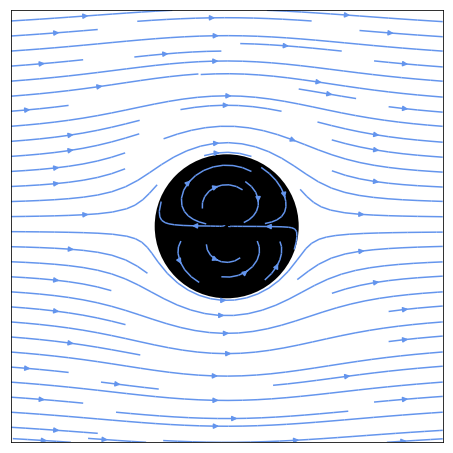

In [14]:
#from: https://tonysyu.github.io/plotting-streamlines-with-matplotlib-and-sympy.html#.Wzq5M9JKjIU

import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy.abc import x, y

%matplotlib inline

def cylinder_stream_function(U=1, R=1):
    r = sympy.sqrt(x**2 + y**2)
    theta = sympy.atan2(y, x)
    return U * (r - R**2 / r) * sympy.sin(theta)

def velocity_field(psi):
    u = sympy.lambdify((x, y), psi.diff(y), 'numpy')
    v = sympy.lambdify((x, y), -psi.diff(x), 'numpy')
    return u, v

import numpy as np

def plot_streamlines(ax, u, v, xlim=(-1, 1), ylim=(-1, 1)):
    x0, x1 = xlim
    y0, y1 = ylim
    Y, X =  np.ogrid[y0:y1:100j, x0:x1:100j]
    ax.streamplot(X, Y, u(X, Y), v(X, Y), color='cornflowerblue')


def format_axes(ax):
    ax.set_aspect('equal')
    ax.figure.subplots_adjust(bottom=0, top=1, left=0, right=1)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_aspect('equal')

import matplotlib.pyplot as plt

psi = cylinder_stream_function()
u, v = velocity_field(psi)

xlim = ylim = (-3, 3)
fig, ax = plt.subplots(figsize=(6, 6))
plot_streamlines(ax, u, v, xlim, ylim)
#ax.streamplot(u,v,xlim,ylim)

c = plt.Circle((0, 0), radius=1, facecolor='k')
ax.add_patch(c)

format_axes(ax)

plt.show()